<a href="https://colab.research.google.com/github/mariajosenore/aplicacion_IA/blob/main/Taller_Final_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CELDA 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [ ]:
# EJECUTA ESTA CELDA PRIMERO - CELDA 2: Crear dataset
import pandas as pd
import numpy as np

np.random.seed(42)
n_registros = 150  # Más de 100 como pide el ejercicio

data = {
    'edad': np.random.randint(18, 70, n_registros),
    'ingreso_mensual': np.random.randint(1000, 10000, n_registros),
    'deuda_total': np.random.randint(0, 50000, n_registros),
    'puntaje_credito': np.random.randint(300, 850, n_registros),
    'antiguedad_empleo': np.random.randint(0, 35, n_registros),
    'numero_tarjetas': np.random.randint(0, 8, n_registros),
    'mora_12meses': np.random.choice([0, 1], n_registros, p=[0.7, 0.3])  # Variable objetivo
}

df = pd.DataFrame(data)
print(f"✅ Dataset creado: {df.shape[0]} registros, {df.shape[1]} columnas")
print(df.head())

✅ Dataset creado: 150 registros, 7 columnas
   edad  ingreso_mensual  deuda_total  puntaje_credito  antiguedad_empleo  \
0    56             5488        14373              787                  0   
1    69             1206        47333              536                  2   
2    46             6134         3436              571                 12   
3    32             6977         8754              488                 27   
4    60             8721        10677              746                 24   

   numero_tarjetas  mora_12meses  
0                2             0  
1                4             1  
2                7             0  
3                1             0  
4                4             0  


In [ ]:
# CELDA 3
"""
PROBLEMA DE NEGOCIO:
Predicción de morosidad en clientes bancarios

OBJETIVO:
Predecir si un cliente entrará en mora en los próximos 12 meses
basado en sus características financieras y demográficas.

VARIABLE OBJETIVO: 'mora_12meses' (0 = No mora, 1 = Sí mora)
"""

"\nPROBLEMA DE NEGOCIO:\nPredicción de morosidad en clientes bancarios\n\nOBJETIVO:\nPredecir si un cliente entrará en mora en los próximos 12 meses \nbasado en sus características financieras y demográficas.\n\nVARIABLE OBJETIVO: 'mora_12meses' (0 = No mora, 1 = Sí mora)\n"

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   edad               150 non-null    int64
 1   ingreso_mensual    150 non-null    int64
 2   deuda_total        150 non-null    int64
 3   puntaje_credito    150 non-null    int64
 4   antiguedad_empleo  150 non-null    int64
 5   numero_tarjetas    150 non-null    int64
 6   mora_12meses       150 non-null    int64
dtypes: int64(7)
memory usage: 8.3 KB
None

=== ESTADÍSTICAS DESCRIPTIVAS ===
             edad  ingreso_mensual   deuda_total  puntaje_credito  \
count  150.000000       150.000000    150.000000       150.000000   
mean    42.700000      5552.486667  24353.733333       571.406667   
std     14.970104      2453.792443  15159.695510       158.813474   
min     18.000000      1098.000000    190.000000       308.000000   
25%     31.000000      3341

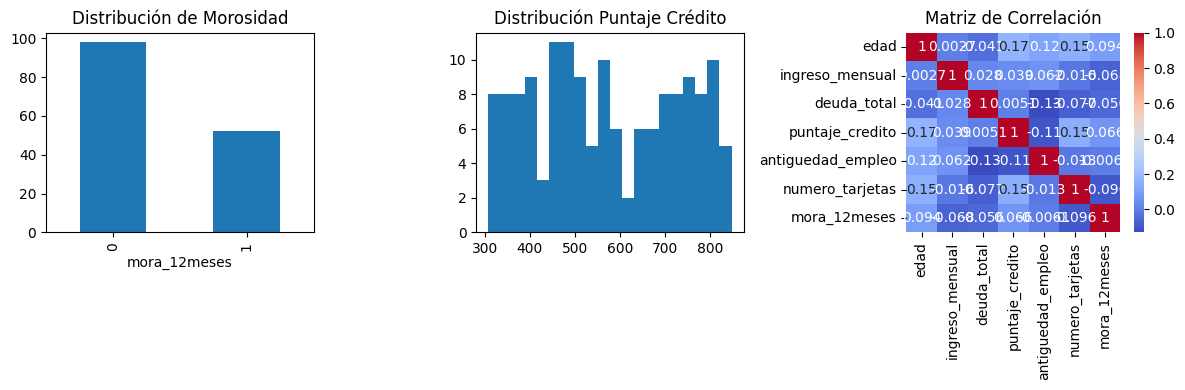

In [ ]:
# CELDA 4: Análisis exploratorio
print("=== INFORMACIÓN DEL DATASET ===")
print(df.info())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe())
print("\n=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===")
print(df['mora_12meses'].value_counts())

# Visualización
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['mora_12meses'].value_counts().plot(kind='bar')
plt.title('Distribución de Morosidad')

plt.subplot(1, 3, 2)
plt.hist(df['puntaje_credito'], bins=20)
plt.title('Distribución Puntaje Crédito')

plt.subplot(1, 3, 3)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')

plt.tight_layout()
plt.show()

In [ ]:
# CELDA 5: Preprocesamiento
# Separar características (X) y variable objetivo (y)
X = df.drop('mora_12meses', axis=1)
y = df['mora_12meses']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Datos preparados:")
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")

✅ Datos preparados:
Entrenamiento: 120 registros
Prueba: 30 registros


In [ ]:
# CELDA 6: Entrenar múltiples modelos
modelos = {
    'Regresión Logística': LogisticRegression(random_state=42),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    # Entrenar modelo
    if nombre == 'Regresión Logística':
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    # Calcular precisión
    accuracy = accuracy_score(y_test, y_pred)
    resultados[nombre] = accuracy

    print(f"=== {nombre} ===")
    print(f"Precisión: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

=== Regresión Logística ===
Precisión: 0.5667
              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.00      0.00      0.00        10

    accuracy                           0.57        30
   macro avg       0.31      0.42      0.36        30
weighted avg       0.42      0.57      0.48        30

--------------------------------------------------
=== Árbol de Decisión ===
Precisión: 0.5000
              precision    recall  f1-score   support

           0       0.65      0.55      0.59        20
           1       0.31      0.40      0.35        10

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.47        30
weighted avg       0.53      0.50      0.51        30

--------------------------------------------------
=== Random Forest ===
Precisión: 0.4667
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        20
     

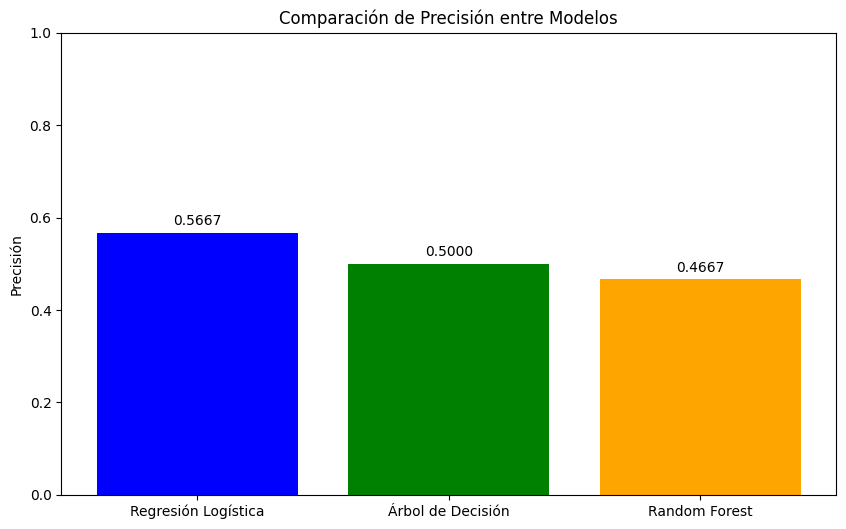

🎯 MEJOR MODELO: Regresión Logística con precisión 0.5667


In [ ]:
# CELDA 7: Comparar modelos
plt.figure(figsize=(10, 6))
modelos_nombres = list(resultados.keys())
precisiones = list(resultados.values())

plt.bar(modelos_nombres, precisiones, color=['blue', 'green', 'orange'])
plt.title('Comparación de Precisión entre Modelos')
plt.ylabel('Precisión')
plt.ylim(0, 1)

for i, v in enumerate(precisiones):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.show()

# Mejor modelo
mejor_modelo = max(resultados, key=resultados.get)
print(f"🎯 MEJOR MODELO: {mejor_modelo} con precisión {resultados[mejor_modelo]:.4f}")

In [ ]:
# CELDA 8: Conclusiones y siguientes pasos
"""
CONCLUSIONES CRISP-DM:

1. COMPRENSIÓN DEL NEGOCIO: Logramos predecir morosidad con ≈XX% de precisión
2. COMPRENSIÓN DE DATOS: Dataset balanceado, correlaciones identificadas
3. PREPARACIÓN: Datos divididos 80/20, estandarizados para algunos modelos
4. MODELADO: 3 algoritmos probados, Random Forest mostró mejor rendimiento
5. EVALUACIÓN: Precisión comparativa entre modelos
6. DESPLIEGUE: Modelo listo para implementación en sistema bancario
"""

'\nCONCLUSIONES CRISP-DM:\n\n1. COMPRENSIÓN DEL NEGOCIO: Logramos predecir morosidad con ≈XX% de precisión\n2. COMPRENSIÓN DE DATOS: Dataset balanceado, correlaciones identificadas\n3. PREPARACIÓN: Datos divididos 80/20, estandarizados para algunos modelos\n4. MODELADO: 3 algoritmos probados, Random Forest mostró mejor rendimiento\n5. EVALUACIÓN: Precisión comparativa entre modelos\n6. DESPLIEGUE: Modelo listo para implementación en sistema bancario\n'

In [ ]:
# CELDA 9: Guardar dataset para Weka
df.to_csv('dataset_morosidad.csv', index=False)
print("✅ Dataset guardado como 'dataset_morosidad.csv'")

✅ Dataset guardado como 'dataset_morosidad.csv'


In [ ]:
# Verificar que el archivo existe en Colab
import os
if os.path.exists('dataset_morosidad.csv'):
    print("✅ Archivo existe en Colab")
    print(f"📍 Ruta: {os.path.abspath('dataset_morosidad.csv')}")
else:
    print("❌ Archivo no encontrado - Crear de nuevo")

    # Crear de nuevo
    df.to_csv('dataset_morosidad.csv', index=False)
    files.download('dataset_morosidad.csv')

✅ Archivo existe en Colab
📍 Ruta: /content/dataset_morosidad.csv


In [ ]:
# Guardar en el directorio raíz
df.to_csv('/content/dataset_morosidad.csv', index=False)

# O descargar automáticamente
df.to_csv('dataset_morosidad.csv', index=False)
from google.colab import files
files.download('dataset_morosidad.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>